**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Regression

In [ ]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ace/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS2-Ace/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [ ]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [ ]:
R_train=R_train.dropna()

In [ ]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [ ]:
R_train.head()

,theta,theta_past_ma10
1,34,28.000000
2,32,31.000000
3,32,31.333333
4,30,31.500000
5,24,31.200000


In [ ]:
R_test.head()

,theta,theta_past_ma10
174,55,53.3
175,60,54.1
176,56,55.4
177,60,55.2
178,59,56.0


## Define the Train and Test (X,y)


In [ ]:
C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-tutorial-prediction/main/data/Processed_Data/Classification_Test.csv", index_col="Unnamed: 0")

In [ ]:
C_train.head()

,congested,theta_past_ma10
0,0,0.557929
1,1,0.562116
2,1,0.562060
3,1,0.597107
4,0,0.675015


In [ ]:
X_train = pd.DataFrame(np.array(C_train['theta_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['congested'].astype(int))

In [ ]:
C_test.head()

,congested,theta_past_ma10
42300,0,0.543044
42301,1,0.552995
42302,0,0.627107
42303,0,0.621367
42304,0,0.605332


In [ ]:
X_test = pd.DataFrame(np.array(C_test['theta_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['congested'].astype(int))

## Import base packages

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
##from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

# Machine Learning Regression

## important global packages

In [ ]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [ ]:
R_train.head()

,theta,theta_past_ma10
1,34,28.000000
2,32,31.000000
3,32,31.333333
4,30,31.500000
5,24,31.200000


In [ ]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [ ]:
R_test.head()

,theta,theta_past_ma10
174,55,53.3
175,60,54.1
176,56,55.4
177,60,55.2
178,59,56.0


In [ ]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [ ]:
from sklearn import linear_model

In [ ]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [ ]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: 0.6116541319439832


In [ ]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,53.296344
1,54.044288
2,55.259696
3,55.072710
4,55.820654
...,...
81,84.896962
82,85.644905
83,87.140792
84,87.514764


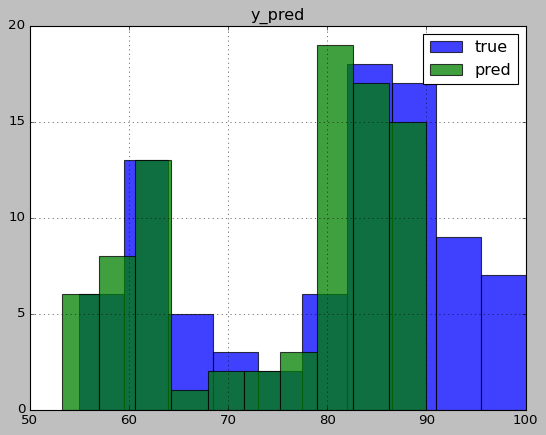

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-39-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [ ]:
# calculate R2
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -3.795605310251461


In [ ]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,52.885667
1,53.994667
2,53.465333
3,50.359333
4,53.283333
...,...
81,54.210000
82,54.210000
83,54.210000
84,54.210000


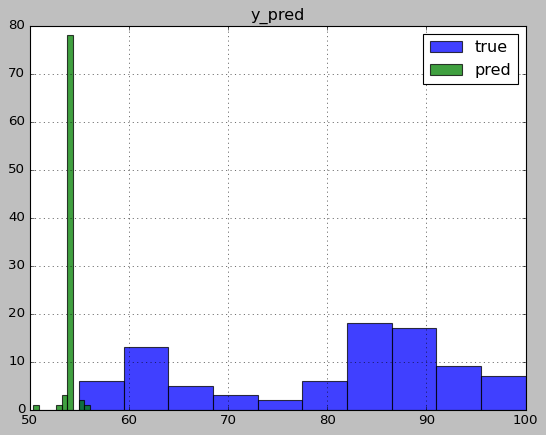

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()
